In [1263]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
import pandas as pd
from numpy.linalg import norm
from scipy.spatial.distance import cdist

In [1280]:
X, y = make_circles(factor=0.3)
X = np.vstack((X, np.random.normal(scale=0.05, size=(50, 2))))
y = np.hstack((y, np.full(50, 3)))

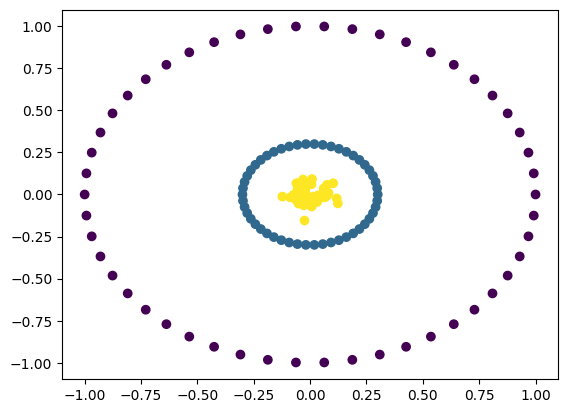

In [1265]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [1122]:
# A = np.exp(-cdist(X, X, metric='sqeuclidean')/(2))-1
# A

(0.3801432310079177, 0.5849983257151796)

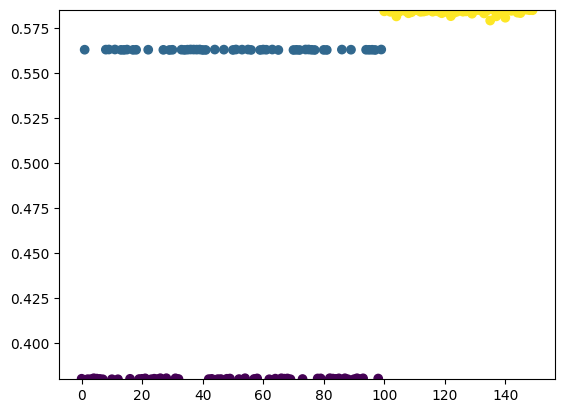

In [1277]:
A = np.exp(-cdist(X, X, metric='sqeuclidean')/(2))
# A = cdist(X, X, metric='sqeuclidean')/(2)
# D = np.diag(A.sum(axis=1)) # axis=1 means sum within row
# W = A @ np.linalg.inv(D)

# t_max = 1000

# vs = []
# v_t = np.random.rand(W.shape[1])

# vs.append(v_t)
# for t in range(t_max):
#     v_t = W @ v_t
#     # v_t = v_t / norm(v_t)
#     vs.append(v_t)

# t_sel = 4
# plt.scatter(x=range(len(vs[t_sel])), y=vs[t_sel], c=y)
# ax = plt.gca()
# ax.set_ylim([min(vs[t_sel]), max(vs[t_sel])])

In [1304]:
A = np.exp(-cdist(X, X, metric='sqeuclidean')/(2))
# A = cdist(X, X, metric='sqeuclidean')/(2)
D = np.diag(A.sum(axis=1)) # axis=1 means sum within row
W = A @ np.linalg.inv(D)
I = np.identity(n=W.shape[1])
L = (I - np.linalg.inv(D)) @ A

eigh_vec_W = np.linalg.eigh(W).eigenvectors
eigh_L = np.linalg.eigh(L)
eig_vec_L = eigh_L.eigenvectors[::-1]
eig_vec_L - eigh_vec_W
# eigh_vec_W
# plt.scatter(x=range(len(vec)), y=vec, c=y)
# ax = plt.gca()
# ax.set_ylim([min(vec), max(vec)])

array([[ 0.06601722, -0.07161478,  0.0237911 , ..., -0.12362097,
         0.12483731,  0.01475951],
       [ 0.16141205, -0.13527869,  0.12820136, ..., -0.05223208,
         0.04812741,  0.01410462],
       [ 0.06571475, -0.0774376 ,  0.06396689, ..., -0.09504264,
         0.17480639,  0.01518069],
       ...,
       [ 0.03855394, -0.15453466, -0.12414507, ..., -0.04084373,
        -0.18868219, -0.02904628],
       [-0.04039799, -0.01226242, -0.08071417, ...,  0.04369828,
        -0.08599113,  0.00094247],
       [ 0.0185591 , -0.15414495, -0.10848579, ..., -0.03915003,
        -0.16316352, -0.02884555]], shape=(150, 150))

(0.37927825650769625, 0.587001676028762)

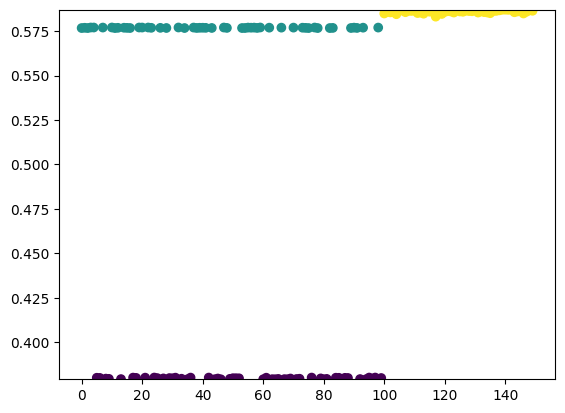

In [1240]:
vt_long = vs[t_sel].reshape(-1, 1)
km = KMeans(n_clusters=3, init='random')
y_hat = km.fit_predict(vt_long)

plt.scatter(x=range(len(vs[t_sel])), y=vs[t_sel], c=y_hat)
ax = plt.gca()
ax.set_ylim([min(vs[t_sel]), max(vs[t_sel])])

In [1243]:
iris_data = load_iris(as_frame=True)
X = iris_data.data
y = iris_data.target

In [1126]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


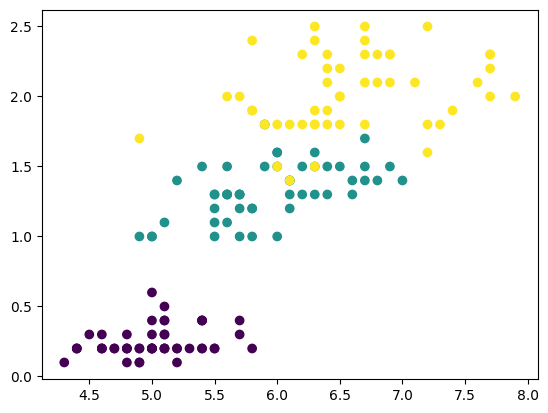

In [1244]:
plt.scatter(x=X['sepal length (cm)'], y=X['petal width (cm)'], c=y)

In [1128]:
cdist(X, X, metric='sqeuclidean')/(2)

array([[ 0.   ,  0.145,  0.13 , ...,  9.945, 10.815,  8.57 ],
       [ 0.145,  0.   ,  0.045, ..., 10.12 , 11.13 ,  8.625],
       [ 0.13 ,  0.045,  0.   , ..., 10.865, 11.755,  9.24 ],
       ...,
       [ 9.945, 10.12 , 10.865, ...,  0.   ,  0.19 ,  0.205],
       [10.815, 11.13 , 11.755, ...,  0.19 ,  0.   ,  0.295],
       [ 8.57 ,  8.625,  9.24 , ...,  0.205,  0.295,  0.   ]],
      shape=(150, 150))

70


(0.03928425241148588, 0.1624995983282502)

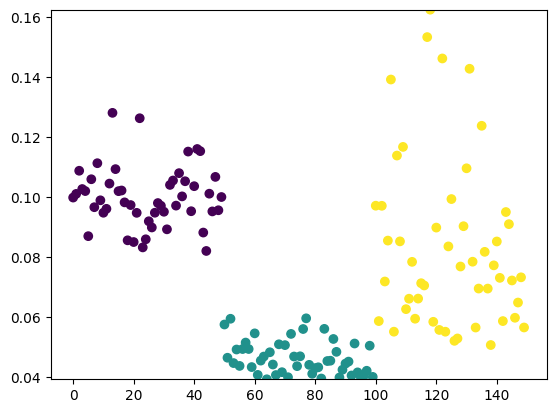

In [1245]:
# A = np.exp(-cdist(X, X, metric='sqeuclidean')/(2))
A = cdist(X, X, metric='sqeuclidean')/(2)
D = np.diag(A.sum(axis=1)) # axis=1 means sum within row
W = np.linalg.inv(D) @ A


vs = []
v_t = np.random.rand(W.shape[1])
vs.append(v_t)

ds = []
d_0 = v_t
ds.append(d_0)
# ds.append(5)
# abs(ds[-1] - ds[-2])
while (len(ds) < 2) or (norm(ds[-1] - ds[-2]) > (1e-5/W.shape[1])):
    v_t = v_t @ W
    v_t = v_t / norm(v_t)
    vs.append(v_t)
    ds.append(vs[-1] - vs[-2])

t_sel = len(vs) -1
# t_sel = 20
print(t_sel)
plt.scatter(x=range(len(vs[t_sel])), y=vs[t_sel], c=y)
ax = plt.gca()
ax.set_ylim([min(vs[t_sel]), max(vs[t_sel])])

(-0.26627389539372914, 0.794856661107168)

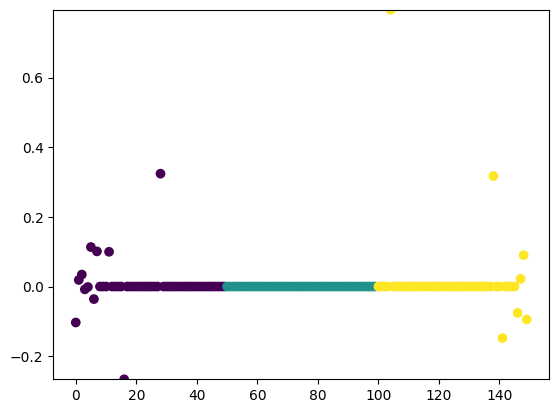

In [1262]:
vec = np.linalg.eigh(A).eigenvectors[0]
plt.scatter(x=range(len(vec)), y=vec, c=y)
ax = plt.gca()
ax.set_ylim([min(vec), max(vec)])

In [1130]:
# A = np.exp(-cdist(X, X, metric='sqeuclidean')/(2))
A = cdist(X, X, metric='sqeuclidean')/(2)
D = np.diag(A.sum(axis=1)) # axis=1 means sum within row
W = A @ np.linalg.inv(D)


vs = []
# v_t = np.random.rand(W.shape[1])
v_t = A.sum(axis=1)/A.sum()
v_t = v_t / norm(v_t)
v_t
vs.append(v_t)

for t in range(1000):
    v_t = (W @ v_t)/norm(W @ v_t)
    # v_t = v_t / norm(v_t)
    vs.append(v_t)

In [1131]:
a = np.array([-1, 1, 1]).reshape(3, 1)
b = np.array([2, 1, 1]).reshape(3, 1)
A = cdist(a, b, metric='euclidean')/(2)
A

array([[1.5, 1. , 1. ],
       [0.5, 0. , 0. ],
       [0.5, 0. , 0. ]])